<center><br><font size="6"><font face="Times New Roman"><strong> SISTEM FUZZY LOGIC UNTUK PENYIRAMAN TANAMAN
    
___

Berkebun adalah salah satu hobi yang sering dilakukan untuk mengisi waktu luang, memperindah halaman rumah atau bahkan dijadikan sebagai pekerjaan. Tanaman punya banyak variasi. Tanaman yang ingin dibudidayakan harus dirawat dengan baik. Salah satu caranya adalah dengan memposisikan tanaman agar terkena sinar matahari yang berfungsi sebagai proses fotosintesis tumbuhan atau menjaga kelembaban. Suhu dan kelembaban sekitar tanaman harus diperhatikan dengan baik.<br>

Kontrol pada tanaman sudah banyak dilakukan, entah itu tanaman budidaya didalam ruangan atau diluar ruangan. Otomisasi memudahkan kita dalam memantau kondisi tanaman disekitar kebun. Tentu saja otomisasi dibutuhkan keahlian untuk menentukan penyiraman tanaman dengan memperhitungkan kebutuhan air yang harus dialirkan.<br>

Penyiraman tanaman dengan memberikan keputusan secara otomatis menggunakan metode fuzzy logic.

In [1]:
#library untuk komputasi data matematis
import numpy as np

#library fuzzy logic di Python
import skfuzzy as fuzz
from skfuzzy import control as ctrl

#library untuk plot sebuah data
import matplotlib.pyplot as plt

#library untuk membuat tabel
from tabulate import tabulate

## Fuzzyfikasi

Suatu proses untuk mengubah nilai input yang mempunyai nilai tegas menjadi variabel linguistik dengan menggunakan fungsi keanggotaan yang disimpan dalam basis pengetahuan fuzzy. Terdapat 3 variabel, yaitu 2 variabel input dan 1 variabel output.

### Variabel Input  (Antecedents) :
1. Suhu : **Panas**, **Sejuk**, dan **Dingin**
2. Kelembaban : **Kering**, **Lembab**, **Basah**

### Variabel Output (Consequents) :
3. Motor Penyiraman,  yaitu: **Siram Sedikit**, **Siram Secukupnya**, dan **Siram Banyak**

### Nilai Lingustik
Nilai lingustik atau semesta pembicaraan adalah nilai keseluruhan yang diperbolehkan untuk dioperasikan dalam suatu variabel fuzzy, dan ada juga Domain fuzzy yang merupakan keseluruhan nilai yang diizinkan dalam semesta pembicaraan dan boleh dioperasikan dalam suatu himpunan fuzzy.

Dari tiga variabel yang digunakan, maka nilai linguistiknya sebagai berikut:

Nilai linguistik input:
1. Variabel **Suhu**, yaitu: **Panas**, **Sejuk**, dan **Dingin**
2. Variabel **Kelembaban**, yaitu: **Kering**, **Lembab**, **Basah**

Nilai linguistik output:
3. Variabel Motor Penyiraman,  yaitu: **Siram Sedikit**, **Siram Secukupnya**, dan **Siram Banyak**


>Kurva yang akan digunakan adalah jenis kurva linier naik, kurva linier turun dan kurva segitiga, sistem inferensinya dengan fuzzy mamdani dan defuzzifikasinya menggunakan metode centroid (COG).

### *Keanggotaan input 1 (Suhu)*
|  Semesta pembicaraan  |   Nama Himpunan    |   Domain  |
|-----------------------|--------------------|-----------|
|        [1,40]         |      Dingin        |   [1,20]  |
|                       |      Sejuk         |   [18,28] |
|                       |      Panas         |   [25,40] | 

### Deklarasi Suhu sebagai Variabel Input 1

Fungsi Keanggotaan kurva linier turun (Dingin), kurva segitiga (Sejuk) dan kurva linier naik (Panas).

$μSuhu [Dingin] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \geq 20 \\
       {20-x \over 20-18} & \mbox{; } 18 < x < 20 \\
       1 & \mbox{; } x \leq 18
    \end{array}
\right.$ 

$μSuhu [Sejuk] = 
\left\{
    \begin{array}{ll}
      0 & \mbox{; } x \leq 18 &atau& x \geq 28 \\
       {x-18 \over 23-18} & \mbox{; } 18 < x < 23 \\
     {28-x} \over 28-23 & \mbox{; } 23 \leq x < 28 \\ 
    \end{array}
\right.$ 

$μSuhu [Panas] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 25 \\
       {x-25 \over 40-25} & \mbox{; } 25 < x < 40 \\
       1 & \mbox{; } x \geq 40
    \end{array}
\right.$ 

### Himpunan Fungsi keanggotaan Suhu

In [2]:
# Suhu dengan range nilai dari [1, 40]
#start (1), stop(41), step(1)
suhu= np.arange(1,41,1) 

In [3]:
#Inisiasi fungsi keanggotaan Suhu
suhu_d = fuzz.trimf(suhu, [1, 1, 20])   #titik a(1), titik b(3)
suhu_s = fuzz.trimf(suhu, [18, 23, 28]) #titik a(18, titik b(23), titik c(28)
suhu_p = fuzz.trimf(suhu, [25, 40, 40]) #titik a(25), titik b(40)

### Visualisasi himpunan fungsi keanggotaan suhu

E:\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


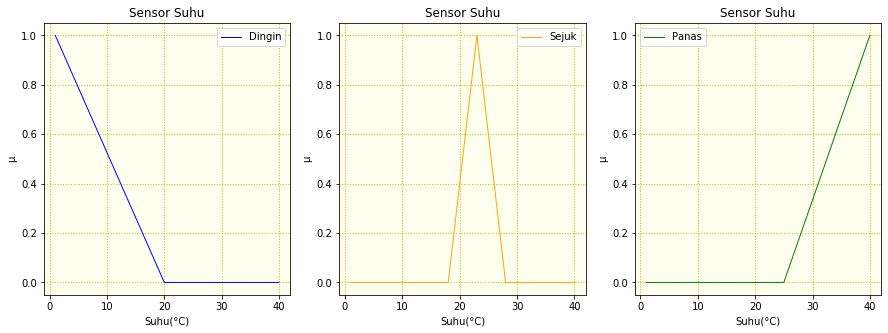

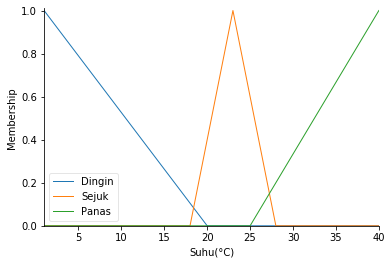

In [4]:
#Plot fungsi keanggotaan Suhu
fig, (ax0, ax1, ax2) = plt.subplots( ncols=3, figsize=(15,5))#ukuran plot (nrows, ncol)

ax0.plot(suhu, suhu_d, 'blue', linewidth=1, label='Dingin') #plot fungsi keanggotaan Suhu dingin
ax1.plot(suhu, suhu_s, 'orange', linewidth=1, label='Sejuk') #plot fungsi keanggotaan Suhu sejuk
ax2.plot(suhu, suhu_p, 'green', linewidth=1, label='Panas') #plot fungsi keanggotaan Suhu panas

#plot ax0 fungsi keanggotaan Suhu dingin
ax0.set_title ('Sensor Suhu') #Judul plot
ax0.set_xlabel('Suhu(°C)') #Label sumbu x
ax0.set_ylabel('µ') #label sumbu y
ax0.set_facecolor("ivory") #warna background plot
ax0.grid(True, color='y', linestyle='dotted', linewidth=1) #garis plot
ax0.legend() #Menampilkan legend pada grafik 

#plot ax1 fungsi keanggotaan Suhu dingin
ax1.set_title ('Sensor Suhu') #Judul plot
ax1.set_xlabel('Suhu(°C)') #Label sumbu x
ax1.set_ylabel('µ') #label sumbu y
ax1.set_facecolor("ivory") #warna background plot
ax1.grid(True, color='y', linestyle='dotted', linewidth=1) #garis plot
ax1.legend() #Menampilkan legend pada grafik 

#plot ax2 fungsi keanggotaan Suhu dingin
ax2.set_title ('Sensor Suhu') #Judul plot
ax2.set_xlabel('Suhu(°C)') #Label sumbu x
ax2.set_ylabel('µ') #label sumbu y
ax2.set_facecolor("ivory") #warna background plot
ax2.grid(True, color='y', linestyle='dotted', linewidth=1) #garis plot
ax2.legend() #Menampilkan legend pada grafik

suhu = ctrl.Antecedent(np.arange(1,41,1), 'Suhu(°C)')
suhu['Dingin'] = fuzz.trimf(suhu.universe, [1, 1, 20]) #titik a(1), titik b(3)
suhu['Sejuk'] = fuzz.trimf(suhu.universe, [18, 23, 28]) #titik a(18, titik b(23), titik c(28)
suhu['Panas'] = fuzz.trimf(suhu.universe, [25, 40, 40]) #titik a(25), titik b(40)
 
suhu.view()

### *Keanggotaan input 2 (Kelembaban)*

|  Semesta pembicaraan  |   Nama Himpunan    |   Domain  |
|-----------------------|--------------------|-----------|
|        [1,100]        |      Kering        |   [1,40]  |
|                       |      Lembab        |   [35,75] |
|                       |      Basah         |   [75,100]| 

### Deklarasi Kelembaban sebagai Variabel Input 2
Fungsi Keanggotaan kurva linier turun (Kering), kurva segitiga (Lembab) dan kurva linier naik (Basah).

$μKelembaban [Kering] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \geq 50 \\
       {50-x \over 50-0} & \mbox{; } 0 \leq x < 50 \\ 
    \end{array}
\right.$
   
$μKelembaban [Lembab] = 
\left\{
    \begin{array}{ll}
       {x-0 \over 50-0} & \mbox{; } 0 < x < 50 \\
    {100-x \over 100-50} & \mbox{; } 50 \leq x < 100\\
    \end{array}
\right.$

$μKelembaban [Basah] = 
\left\{
    \begin{array}{ll}
    0 & \mbox{; } x \leq 50 \\
       {x-50 \over 100-50} & \mbox{; } 50 \leq x \leq 100 \\
    \end{array}
\right.$


### Himpunan fungsi keanggotaan Kelembaban

In [5]:
# Kelembaban dengan range nilai dari [1, 100]
#start (1), stop(101), step(1)
kelembaban= np.arange(1,101,1)

In [6]:
#Inisiasi fungsi keanggotaan Kelembaban
kelembaban_k = fuzz.trimf(kelembaban, [1, 1 , 50]) #titik a(1), titik b(50)
kelembaban_l = fuzz.trimf(kelembaban, [1, 50, 100]) #titik a(1), titik b(50), titik c(100)
kelembaban_b = fuzz.trimf(kelembaban, [50, 100, 100]) #titik a(50), titik b(100)

### Visualisasi himpunan fungsi keanggotaan kelembaban

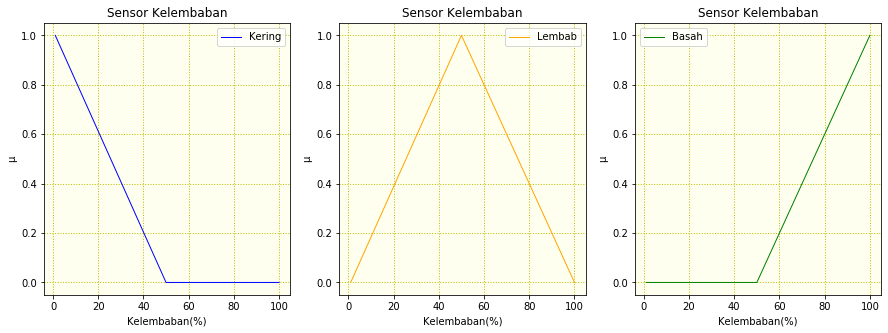

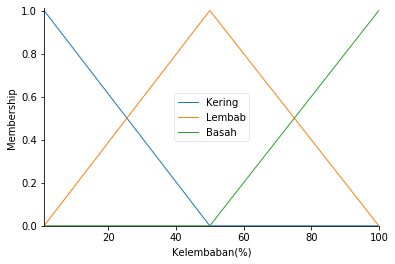

In [7]:
#Plot fungsi keanggotaan Kelembaban
fig, (ax0, ax1, ax2) = plt.subplots( ncols=3, figsize=(15,5))#ukuran plot (nrows, ncol)

ax0.plot(kelembaban, kelembaban_k, 'blue', linewidth=1, label='Kering') #plot fungsi keanggotaan Kelembaban kering
ax1.plot(kelembaban, kelembaban_l, 'orange', linewidth=1, label='Lembab') #plot fungsi keanggotaan Kelembaban lembab
ax2.plot(kelembaban, kelembaban_b, 'green', linewidth=1, label='Basah') #plot fungsi keanggotaan Kelembaban basah

#plot ax0 fungsi keanggotaan Kelembaban kering
ax0.set_title('Sensor Kelembaban') #Judul plot
ax0.set_xlabel('Kelembaban(%)') #label sumbu x
ax0.set_ylabel('µ') #label sumbu y
ax0.set_facecolor("ivory") #warna background plot
ax0.grid(True, color='y', linestyle='dotted', linewidth=1) #garis plot
ax0.legend() #menampilkan legend pada grafik

#plot ax1 fungsi keanggotaan Kelembaban lembab
ax1.set_title('Sensor Kelembaban') #Judul plot
ax1.set_xlabel('Kelembaban(%)') #label sumbu x
ax1.set_ylabel('µ') #label sumbu y
ax1.set_facecolor("ivory") #warna background plot
ax1.grid(True, color='y', linestyle='dotted', linewidth=1) #garis plot
ax1.legend() #menampilkan legend pada grafik

#plot ax2 fungsi keanggotaan Kelembaban basah
ax2.set_title('Sensor Kelembaban') #Judul plot
ax2.set_xlabel('Kelembaban(%)') #label sumbu x
ax2.set_ylabel('µ') #label sumbu y
ax2.set_facecolor("ivory") #warna background plot
ax2.grid(True, color='y', linestyle='dotted', linewidth=1) #garis plot
ax2.legend() #menampilkan legend pada grafik

kelembaban = ctrl.Antecedent(np.arange(1,101,1), 'Kelembaban(%)')
kelembaban['Kering'] = fuzz.trimf(kelembaban.universe, [1, 1 , 50]) #titik a(1), titik b(50)
kelembaban['Lembab'] = fuzz.trimf(kelembaban.universe, [1, 50, 100]) #titik a(1), titik b(50), titik c(100)
kelembaban['Basah'] = fuzz.trimf(kelembaban.universe, [50, 100, 100]) #titik a(50), titik b(100)

kelembaban.view()

### *Keanggotaan Output (Motor Penyiraman)*

|  Semesta pembicaraan  |   Nama Himpunan      |   Domain  |
|-----------------------|----------------------|-----------|
|        [1,10]         |      Siram Sedikit   |   [1,3]   |
|                       |      Siram Secukupnya|   [4,6]   |
|                       |      Siram Banyak    |   [5,10]  | 

### Deklarasi Motor sebagai Variabel Output

Fungsi Keanggotaan kurva segitiga (Siram Sedikit, Siram secukupnya, Siram Banyak).

$μMotor Penyiraman [Siram Sedikit] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \geq 4 \\
       {x-1 \over 2-1} & \mbox{; } 1 \leq x < 2 \\
       {4-x \over 4-2} & \mbox{; } 2 \leq x < 4 \\
    \end{array}
\right.$

$μMotor Penyiraman [Siram Secukupnya] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 2 &atau& x \geq 6\\
       {x-2\over 4-2} &\mbox{; } 2 < x < 4 \\
       {6-x\over 6-4} & \mbox{; } 4 \leq x < 6 \\
    \end{array}
\right.$ 

$μMotor Penyiraman [Siram Banyak] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 4 \\
       {x-4 \over 7-4} & \mbox{; } 4 < x < 7 \\
       {10-x \over 10-7} & \mbox{; } 7 \leq x < 10 \\
       1 & \mbox{; } x = 7
    \end{array}
\right.$

### Himpunan fungsi keanggotaan Motor penyiraman

In [8]:
# Output Motor penyiraman dengan range nilai [1, 10]
#start (1), stop(11), step(1)
motor= np.arange(1,11,1)

In [9]:
#Inisiasi fungsi keanggotaan motor penyiraman
motor_s= fuzz.trimf(motor, [1,2,4])  #titik a(1), titik b(2), titik c(4)
motor_m= fuzz.trimf(motor,[2,4,6])   #titik a(2), titik b(4), titik c(6) 
motor_b= fuzz.trimf(motor, [4,7,10]) #titik a(4), titik b(7), titik c(10)

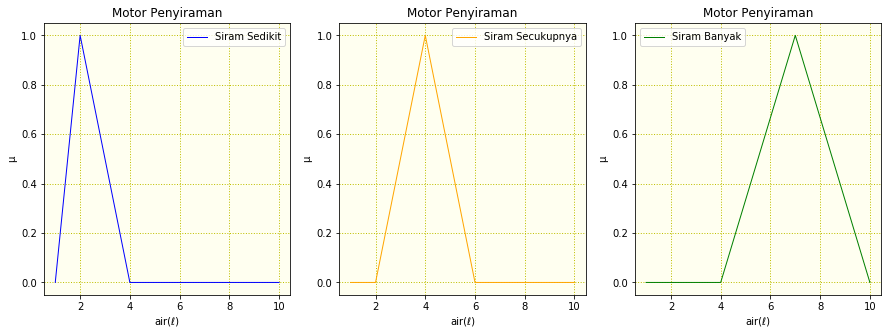

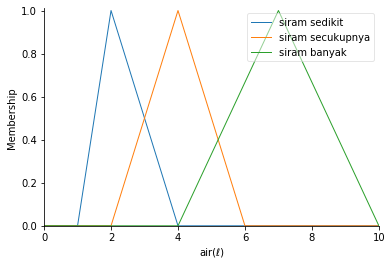

In [10]:
#plot fungsi keanggotaan motor penyiraman
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(15,5)) #ukuran plot (nrows, ncol)

ax0.plot(motor, motor_s,'blue', linewidth=1, label='Siram Sedikit') #plot fungsi keanggotaan motor penyiraman siram sedikit
ax1.plot(motor,motor_m,'orange',linewidth=1,label='Siram Secukupnya') #plot fungsi keanggotaan motor penyiraman siram secukupnya
ax2.plot(motor, motor_b,'green',linewidth=1,label='Siram Banyak') #plot fungsi keanggotaan motor penyiraman siram banyak

#plot ax1 fungsi keanggotaan motor penyiraman siram sedikit
ax0.set_title ('Motor Penyiraman') #Judul plot
ax0.set_xlabel('air(ℓ)') #label sumbu x
ax0.set_ylabel('µ') #label sumbu y
ax0.set_facecolor("ivory")#warna background plot
ax0.grid(True, color='y', linestyle='dotted', linewidth=1) #garis plot
ax0.legend() #menampilkan legend pada grafik

#plot ax1 fungsi keanggotaan motor penyiraman siram secukupnya
ax1.set_title ('Motor Penyiraman') #Judul plot
ax1.set_xlabel('air(ℓ)') #label sumbu x
ax1.set_ylabel('µ') #label sumbu y
ax1.set_facecolor("ivory")#warna background plot
ax1.grid(True, color='y', linestyle='dotted', linewidth=1) #garis plot
ax1.legend() #menampilkan legend pada grafik

#plot ax1 fungsi keanggotaan motor penyiraman siram banyak
ax2.set_title ('Motor Penyiraman') #Judul plot
ax2.set_xlabel('air(ℓ)') #label sumbu x
ax2.set_ylabel('µ') #label sumbu y
ax2.set_facecolor("ivory")#warna background plot
ax2.grid(True, color='y', linestyle='dotted', linewidth=1) #garis plot
ax2.legend() #menampilkan legend pada grafik

motor = ctrl.Consequent(np.arange(0,11,1), 'air(ℓ)')#motor sebagai output
#Inisiasi fungsi keanggotaan motor penyiraman
motor['siram sedikit']= fuzz.trimf(motor.universe, [1,2,4])  #titik a(1), titik b(2), titik c(4)
motor['siram secukupnya']= fuzz.trimf(motor.universe,[2,4,6])   #titik a(2), titik b(4), titik c(6) 
motor['siram banyak']= fuzz.trimf(motor.universe, [4,7,10]) #titik a(4), titik b(7), titik c(10)

motor.view()

## Contoh Kasus

Jika **Suhu 28°C** & **Kelembaban 11%**, berapa banyak air untuk menyiram tanaman?

#### Perhitungan Manual Derajat Fungsi Keanggotaan Suhu

$μSuhu[Panas] = 
\left\{
    \begin{array}{ll}
       {28-25 \over 40-25} & \mbox{; } 25 < 28 < 40 \\
    \end{array}
\right.$

Hasil

$μSuhu[Panas] = 0.2$

#### Perhitungan Manual Derajat Fungsi Keanggotaan Kelembaban

$μKelembaban [Kering] = 
\left\{
    \begin{array}{ll}
       {50-11 \over 50-1} & \mbox{; } 0 \leq 11 < 50 \\ 
    \end{array}
\right.$

Hasil

$μKelembaban [Kering] = 0.7959183673469388$

$μKelembaban [Lembab] = 
\left\{
    \begin{array}{ll}
       {11-1 \over 50-1} & \mbox{; } 0 < 11 < 50 \\
    \end{array}
\right.$

Hasil

$μKelembaban [Lembab] = 0.20408163265306123$

>Derajat keanggotaan yang diketahui dari nilai input adalah:<br>
**Suhu Panas(0.2), Kelembaban Kering(0.7959183673469388), Kelembaban Lembab(0.20408163265306123)**

## Rule Base

Ada 9 aturan yang dibentuk guna berfungsi secara otomatis dalam mengambil keputusan. Aturan tersebut adalah sebagai
berikut :

In [28]:
m = np.array([['Kering', 'Siram Banyak', 'Siram Banyak', 'Siram Banyak'],
              ['Sedang', 'Tidak Siram', 'Siram Sedang', 'Siram Sedang'],
              ['Basah', 'Tidak Siram', 'Tidak Siram', 'Siram Sedang']])
headers = ["        Suhu\nKelembaban", 'Dingin', 'Sedang', 'Panas']

# tabulate data
table = tabulate(m, headers, tablefmt="fancy_grid")

# output
print(table)

╒════════════════╤══════════════╤══════════════╤══════════════╕
│         Suhu   │ Dingin       │ Sedang       │ Panas        │
│ Kelembaban     │              │              │              │
╞════════════════╪══════════════╪══════════════╪══════════════╡
│ Kering         │ Siram Banyak │ Siram Banyak │ Siram Banyak │
├────────────────┼──────────────┼──────────────┼──────────────┤
│ Sedang         │ Tidak Siram  │ Siram Sedang │ Siram Sedang │
├────────────────┼──────────────┼──────────────┼──────────────┤
│ Basah          │ Tidak Siram  │ Tidak Siram  │ Siram Sedang │
╘════════════════╧══════════════╧══════════════╧══════════════╛


| No | Input (1) Suhu | Input (2) Kelembaban | Output  Motor Penyiraman  | 
|----|----------------|----------------------|---------------------------|
| 1  |   Sejuk        |   Lembab             |    Siram Sedikit          | 
| 2  |   Dingin       |   Lembab             |    Siram Sedikit          | 
| 3  |   Panas        |   Lembab             |    Siram Sedikit          | 
| 4  |   Sejuk        |   Kering             |    Siram Banyak           |  
| 5  |   Dingin       |   Kering             |    Siram Banyak           | 
| 6  |   Panas        |   Kering             |    Siram Banyak           | 
| 7  |   Sejuk        |   Basah              |    Siram Sedikit          | 
| 8  |   Dingin       |   Basah              |    Siram Sedikit          | 
| 9  |   Panas        |   Basah              |    Siram Sedikit          |


E:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
E:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c58da749e8>)

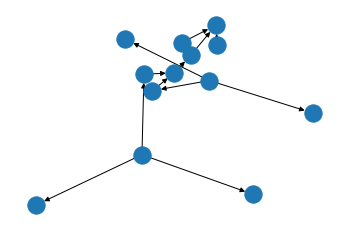

In [12]:
rule1= ctrl.Rule(suhu['Sejuk'] & kelembaban['Lembab'], motor['siram secukupnya'])
#Jika kelembaban lembab & suhu sejuk maka siram secukupnya
rule1.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c58d6ec668>)

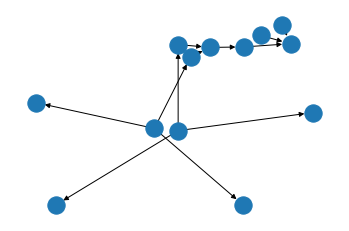

In [13]:
rule2= ctrl.Rule(suhu['Dingin'] & kelembaban['Lembab'], motor['siram sedikit'])
#Jika kelembaban lembab & suhu dingin maka siram sedikit
rule2.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c58d3f25c0>)

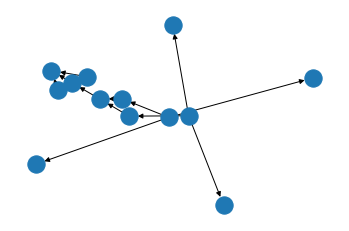

In [14]:
rule3= ctrl.Rule(suhu['Panas'] & kelembaban['Lembab'], motor['siram secukupnya'])
#Jika kelembaban lembab & suhu panas output yang dihasilkan siram secukupnya
rule3.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c58d4aacc0>)

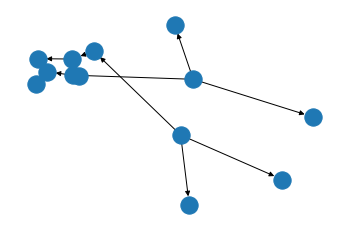

In [15]:
rule4= ctrl.Rule(suhu['Sejuk'] & kelembaban['Kering'], motor['siram banyak'])
#Jika kelembaban kering & suhu sejuk maka siram banyak
rule4.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c58d5cef60>)

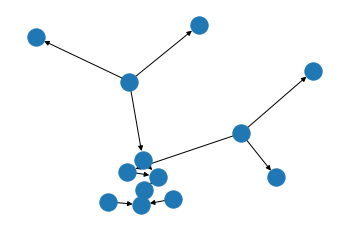

In [16]:
rule5= ctrl.Rule(suhu['Dingin'] & kelembaban['Kering'], motor['siram banyak'])
#Jika kelembaban kering & suhu dingin maka siram banyak
rule5.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c58d434ac8>)

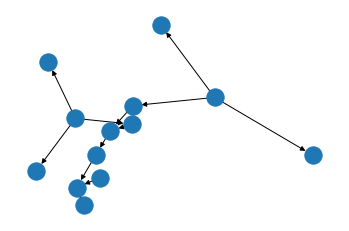

In [17]:
rule6= ctrl.Rule(suhu['Panas'] & kelembaban['Kering'], motor['siram banyak'])
#Jika kelembaban kering & suhu panas maka siram banyak
rule6.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c58d56bf60>)

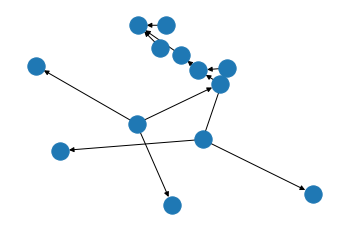

In [18]:
rule7= ctrl.Rule(suhu['Sejuk'] & kelembaban['Basah'], motor['siram sedikit'])
#Jika kelembaban basah & suhu maka siram sedikit
rule7.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c58d9fe7f0>)

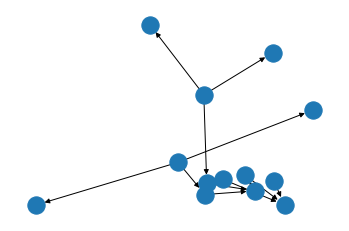

In [19]:
rule8= ctrl.Rule(suhu['Dingin'] & kelembaban['Basah'], motor['siram sedikit'])
#Jika kelembaban basah & suhu dingin maka siram sedikit
rule8.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c58d9fe2e8>)

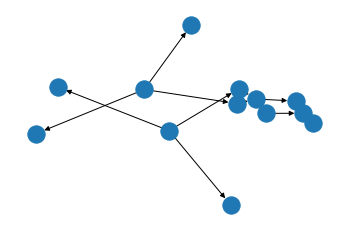

In [20]:
rule9= ctrl.Rule(suhu['Panas'] & kelembaban['Basah'], motor['siram secukupnya'])
#Jika kelembaban basah & suhu panas maka siram secukupnya
rule9.view()

## Fuzzy Inference

Rule yang dibentuk menggunakan operator **AND**. Berdasarkan dari Rule yang dibentuk dengan operator **AND**, maka saat fungsi implikasi mengambil nilai ***Minimum***.

In [21]:
fis_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

#### Perhitungan Manual Fungsi Implikasi

Setelah mendapatkan Derajat Keanggotaan, selanjutnya ke tahap Fungsi Implikasi. Pada kasus ini Rule yang dibentuk menggunakan operator **AND**. Berdasarkan dari Rule yang dibentuk dengan operator **AND**, maka saat fungsi implikasi mengambil nilai ***Minimum***.

Berdasarkan Fungsi Implikasi, maka rule yang aktif adalah **rule3** & **rule6** yaitu:

**rule3 = IF Suhu = panas(0.2) & Kelembaban = lembab (0.20408163265306123)<br>
rule6 = IF Suhu = panas(0.2) & Kelembaban = kering (0.7959183673469388)**

>Karena Rules yang dibentuk menggunakan operator *AND*, maka mengambil nilai minimum.
Jadi, **rule3(0.2) & rule6(0.2)**

## Komposisi Aturan

In [22]:
fis = ctrl.ControlSystemSimulation(fis_ctrl)

#### Perhitungan Manual Komposisi aturan

Hasil fungsi implikasi dari tiap aturan digunakan metode ***MAX*** untuk melakukan komposisi antar semua aturan. Inferensi metode mamdani maka,
didapatkan derajat kebenaran seperti data berikut ini.

Variabel Output Motor Penyiraman:
   1. Derajat kebenaran motor penyiraman sedikit: max(rule2,rule7,rule8)= (0,0,0)= 0
   2. Derajat kebenaran motor penyiraman secukupnya: max(rule1,rule3,rule9)= (0,0.2,0)= 0.2
   3. Derajat kebenaran motor penyiraman banyak: max(rule4,rule5,rule6)=(0,0,0.2)= 0.2
   
>Derajat kebenaran ***motor penyiraman secukupnya &  Derajat kebenaran motor penyiraman banyak adalah 0.2***

## Defuzzifikasi
Defuzzifikasi merupakan pengubahan output fuzzy yang diperoleh dari mesin inferensi menjadi nilai tegas menggunakan fungsi keanggotaan yang sesuai dengan saat dilakukan fuzzyfikasi. Sekarang kita dapat mensimulasikan sistem kontrol hanya dengan menentukan input dan memanggil metode komputasi. Defuzzifikasi menggunakan metode ***centroid***

In [23]:
fis.input['Suhu(°C)'] = 28 #input suhu 28°C
fis.input['Kelembaban(%)'] = 11 #input kelembaban 11%

In [24]:
fis.compute() #melakukan proses perhitungan
print("Hasil Keputusan: ",fis.output['air(ℓ)']) #mencetak hasil perhitungan

Hasil Keputusan:  5.9511111111111115


## Visualisasi keputusan

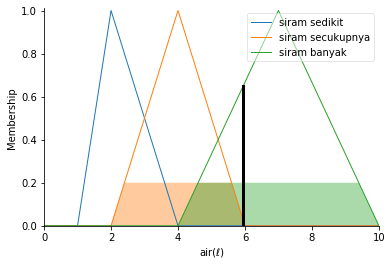

In [25]:
#Visualisasi keputusan
motor.view(sim=fis)

#### Perhitungan Manual Defuzzyfikasi

Defuzzyfikasi dengan metode ***Centroid***

$\begin{align*}
\mathbf{COG} = \frac {(1+2+10)\times 0 + (3+4+5+6+7+8+9)\times 0.2} {(0 +0 +0.2 +0.2 +0.2 +0.2 +0.2 +0.2 +0.2 +0)}
\end{align*}$=
$\begin{align*}
\frac {8.4} {1.4}
\end{align*}$=
$\begin{align*}
 6
\end{align*}$

>***Suhu 28°C & Kelembaban 11%*** menghasilkan ***Motor penyiraman*** yaitu ***Siram banyak sebanyak 6ℓ air***

### Membandingkan perhitungan komputasi dengan perhitungan manual

In [26]:
keputusan = fis.compute()
keputusan = fis.output['air(ℓ)']
print ("Perhitungan hasil komputasi = %.2f" % keputusan)

Perhitungan hasil komputasi = 5.95


In [29]:
manual = 6 #Hasil perhitungan manual
akurasi = keputusan*100/manual ## akurasi jika nilai komputasi dibawah manual
error = 100-akurasi
print ("Akurasi = %.2f" % akurasi + " %")
print ("Error = %.2f" % error  + " %")

Akurasi = 99.19 %
Error = 0.81 %


# Kesimpulan

A. Untuk menghasilkan keputusan, maka ada 4 tahapan:
   
1. Menentukan himpunan fuzzy, merubah nilai tegas menjadi fungsi keanggotaan. Baik variabel input atau variabel output. 
2. Aplikasi fungsi implikasi, proses menalar input untuk menentukan output dalam mengambil keputusan. Salah satu model penalaran yang banyak dipakai adalah penalaran maxmin. Pertama melakukan operasi *min* hasil *fuzzifikasi*, kedua dengan operasi *max* untuk mendapatkan output yang akan didefuzzifikasikan sebagai pengambilan keputusan.
3. Komposisi aturan, inferensi diperoleh dari kumpulan dan korelasi antar aturan. Metode yang digunakan dalam melakukan inferensi sistem fuzzy, yaitu : max, additive dan probabilistik OR.
4. Penegasan (Defuzzy), input defuzzifikasi didapat dari komposisi aturan fuzzy yang dibentuk, sedangkan output adalah bilangan pada domain himpunan fuzzy tersebut. Tahap ini adalah tahap untuk menentukan keputusan. Metode defuzzifikasi: Centroid, Bisektor, Mean of Maximum (MOM), Metode Largest of Maximum (LOM), Smallest of Maximum (SOM).

B. Fuzzy logic sangat membantu kita dalam mengambil keputusan pada rentang nilai abu- abu.<br>
C. Fuzzy logic di Python dengan perhitungan manual minim error

# Referensi

<a href= "https://youtu.be/jrx1-c4RFsg" target="_blank">Fuzzy Logic: 2 Membership Functions
    
<a href= "https://youtu.be/EbsubXWfKRM" target="_blank">Fuzzy Logic: 5 Model Fuzzy Mamdani

<a href= "https://youtu.be/G6RI-eWjw7s" target="_blank">Tutorial 2 - Menghitung Output Logika Fuzzy secara Matematis

<a href="https://scikit-fuzzy.readthedocs.io/en/latest/auto_examples/plot_tipping_problem_newapi.html/" target="_blank">The Tipping Problem</a>

<cite data-cite="Sistem Fuzzy Logic Tertanam Pada Mikrokontroler Untuk Penyiraman Tanaman Pada Rumah Kaca">Andi Farmadi, Dodon T.Nugrahadi, Fatma Indriani, Oni Soesanto.2017. Sistem Fuzzy Logic Tertanam Pada Mikrokontroler Untuk Penyiraman Tanaman Pada Rumah Kaca</cite>

<cite data-cite="Peningkatan Performansi Rumah Sakit Melalui Rekomendasi Sistem Berbasis Fuzzy-Mamdani dengan Pemanfaatan Grafik Barber-Johnson">Erwien Tjipta Wijaya.2012. Peningkatan Performansi Rumah Sakit Melalui Rekomendasi Sistem Berbasis Fuzzy-Mamdani dengan Pemanfaatan Grafik Barber-Johnson</cite>

<cite data-cite="Mengukur Tingkat Kepuasan Mahasiswa Terhadap Kinerja Dosen Menggunakan Metode Fuzzy Mamdani">Sepri Yanti Br Tarigan, Melva Lumban Tobing, Zakarias Situmorang, Oni Soesanto.2017. Mengukur Tingkat Kepuasan Mahasiswa Terhadap Kinerja Dosen Menggunakan Metode Fuzzy Mamdani</cite>